In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate, Activation

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

#split train datasets and validation datasets

split = 0.2

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [5]:
# train, test dataset을 0-60, 185-250, 185-330, 370-, 240-300, 330-370, 370-450, 290-400 구간으로 나누기
# 50이하인 구간이거나 뚜렷한 특징이 없는 구간은 삭제

df1_x_train = x_train[:, 0:60]
df2_x_train = x_train[:, 185:250]
df3_x_train = x_train[:, 185:330]
df4_x_train = x_train[:, 370:]
df5_x_train = x_train[:, 240:300]
df6_x_train = x_train[:, 330:370]
df7_x_train = x_train[:, 370:450]
df8_x_train = x_train[:, 290:400]

df1_x_valid = x_valid[:, 0:60]
df2_x_valid = x_valid[:, 185:250]
df3_x_valid = x_valid[:, 185:330]
df4_x_valid = x_valid[:, 370:]
df5_x_valid = x_valid[:, 240:300]
df6_x_valid = x_valid[:, 330:370]
df7_x_valid = x_valid[:, 370:450]
df8_x_valid = x_valid[:, 290:400]

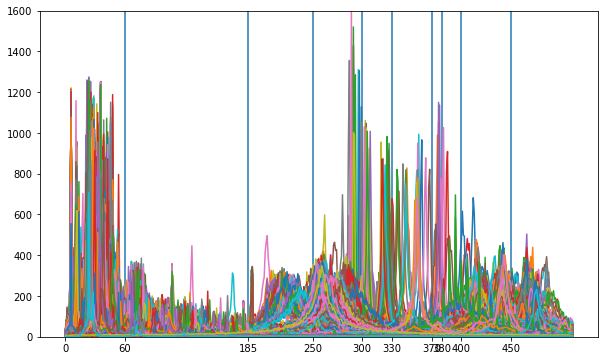

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.axvline(x=60)
plt.axvline(x=185)
plt.axvline(x=250)
plt.axvline(x=300)
plt.axvline(x=330)
plt.axvline(x=370)
plt.axvline(x=380)
plt.axvline(x=400)
plt.axvline(x=450)
plt.ylim(0,1600)
plt.xticks([0, 60, 185, 250, 300, 330, 370, 380, 400, 450], 
           [0, 60, 185, 250, 300, 330, 370, 380, 400, 450])
for i in range(len(df)):
    plt.plot(df.iloc[i,1:])
plt.show()

### 모델 생성

In [7]:
#df1-8에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df1_input)
df1_layer = MaxPooling1D(pool_size=4, padding='same')(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_layer = Dense(32)(df1_layer)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Activation('relu')(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

In [8]:
df2_input = Input(shape=(df2_x_train.shape[1],1))

df2_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df2_input)
df2_layer = MaxPooling1D(pool_size=4, padding='same')(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_layer = Dense(32)(df2_layer)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Activation('relu')(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

In [9]:
df3_input = Input(shape=(df3_x_train.shape[1],1))

df3_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df3_input)
df3_layer = MaxPooling1D(pool_size=4, padding='same')(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_layer = Dense(32)(df3_layer)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Activation('relu')(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

In [10]:
df4_input = Input(shape=(df4_x_train.shape[1],1))

df4_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df4_input)
df4_layer = MaxPooling1D(pool_size=4, padding='same')(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_layer = Dense(32)(df4_layer)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Activation('relu')(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

In [11]:
df5_input = Input(shape=(df5_x_train.shape[1],1))

df5_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df5_input)
df5_layer = MaxPooling1D(pool_size=4, padding='same')(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_layer = Dense(32)(df5_layer)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Activation('relu')(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

In [12]:
df6_input = Input(shape=(df6_x_train.shape[1],1))

df6_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df6_input)
df6_layer = MaxPooling1D(pool_size=4, padding='same')(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_layer = Dense(32)(df6_layer)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Activation('relu')(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

In [13]:
df7_input = Input(shape=(df7_x_train.shape[1],1))

df7_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df7_input)
df7_layer = MaxPooling1D(pool_size=4, padding='same')(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_layer = Dense(32)(df7_layer)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Activation('relu')(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

In [14]:
df8_input = Input(shape=(df8_x_train.shape[1],1))

df8_layer = Conv1D(kernel_size=32, filters=10, activation='relu', padding='same')(df8_input)
df8_layer = MaxPooling1D(pool_size=4, padding='same')(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_layer = Flatten()(df8_layer)
df8_layer = Dense(32)(df8_layer)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Activation('relu')(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

In [15]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output])

In [16]:
#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(64)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.7)(z)
z = Dense(5, activation='softmax')(z)

In [17]:
#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input], outputs=z)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

### 모델 학습

### conv kernel size 32 droupout 0.7 dense 32
### concat dense 64 dropout 0.7

In [24]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train], y_train,
                 epochs=300, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-14 12:13:24.120366: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-07-14 12:13:27.244478: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-14 12:13:28.178004: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-14 12:13:28.924756: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


840/840 [==============================] - 23s 21ms/step - loss: 1.1956 - accuracy: 0.5981 - f1_score: 0.3146 - val_loss: 0.9434 - val_accuracy: 0.6482 - val_f1_score: 0.2687
Epoch 2/300
840/840 [==============================] - 17s 20ms/step - loss: 0.9432 - accuracy: 0.6584 - f1_score: 0.3192 - val_loss: 0.8718 - val_accuracy: 0.6738 - val_f1_score: 0.2950
Epoch 3/300
840/840 [==============================] - 17s 20ms/step - loss: 0.9147 - accuracy: 0.6670 - f1_score: 0.3230 - val_loss: 0.8452 - val_accuracy: 0.6833 - val_f1_score: 0.3240
Epoch 4/300
840/840 [==============================] - 17s 20ms/step - loss: 0.8927 - accuracy: 0.6724 - f1_score: 0.3286 - val_loss: 0.8113 - val_accuracy: 0.6973 - val_f1_score: 0.3533
Epoch 5/300
840/840 [==============================] - 17s 21ms/step - loss: 0.8740 - accuracy: 0.6791 - f1_score: 0.3382 - val_loss: 0.7907 - val_accuracy: 0.7015 - val_f1_score: 0.3541
Epoch 6/300
840/840 [==============================] - 17s 20ms/step - loss: 

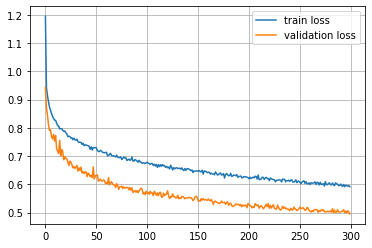

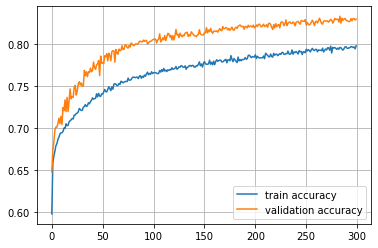

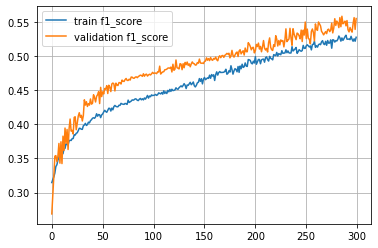

In [25]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### 과적합은 일어나지 않으나 epoch을 300으로 설정해도 학습이 최종 loss 값이 0.5에 그침
### 학습률을 높이면 학습이 진행되지 않음

### conv kernel size 32 droupout 0.8 dense 64 convolution layer 1개
### concat dense 64 dropout 0.7 learning_rate 1e-2

In [41]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train], y_train,
                 epochs=100, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, df5_x_valid,
                                                df6_x_valid, df7_x_valid, df8_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
840/840 [==============================] - 15s 16ms/step - loss: 1.0301 - accuracy: 0.6324 - f1_score: 0.3018 - val_loss: 0.8719 - val_accuracy: 0.6668 - val_f1_score: 0.3164
Epoch 2/100
840/840 [==============================] - 13s 16ms/step - loss: 0.9411 - accuracy: 0.6543 - f1_score: 0.3065 - val_loss: 0.8642 - val_accuracy: 0.6728 - val_f1_score: 0.2832
Epoch 3/100
840/840 [==============================] - 13s 15ms/step - loss: 0.9323 - accuracy: 0.6561 - f1_score: 0.3041 - val_loss: 0.8269 - val_accuracy: 0.6826 - val_f1_score: 0.2928
Epoch 4/100
840/840 [==============================] - 14s 16ms/step - loss: 0.9285 - accuracy: 0.6571 - f1_score: 0.3080 - val_loss: 0.8330 - val_accuracy: 0.6882 - val_f1_score: 0.3282
Epoch 5/100
840/840 [==============================] - 13s 16ms/step - loss: 0.9204 - accuracy: 0.6588 - f1_score: 0.3102 - val_loss: 0.8581 - val_accuracy: 0.6860 - val_f1_score: 0.2983
Epoch 6/100
840/840 [==============================] - 13s 16ms/s

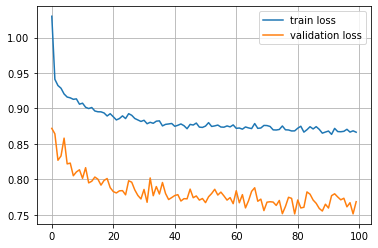

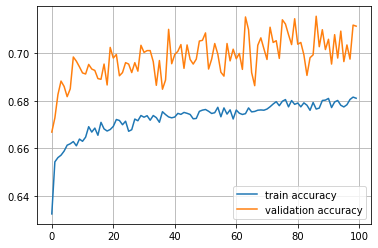

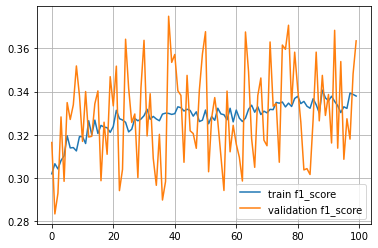

In [42]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### epoch을 100으로 설정했으나 학습이 제대로 되지 않음
### batch size를 줄여봐야겠음

In [18]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train], y_train,
                 epochs=100, batch_size=16, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, 
                                                                df5_x_valid, df6_x_valid, df7_x_valid, df8_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-14 16:03:15.931521: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-14 16:03:18.658575: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2022-07-14 16:03:19.583943: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


   1/1680 [..............................] - ETA: 2:05:56 - loss: 2.5572 - accuracy: 0.0625 - f1_score: 0.0500

2022-07-14 16:03:20.281129: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1680/1680 [==============================] - 30s 15ms/step - loss: 1.1088 - accuracy: 0.6126 - f1_score: 0.2924 - val_loss: 0.9724 - val_accuracy: 0.6336 - val_f1_score: 0.2535
Epoch 2/100
1680/1680 [==============================] - 26s 15ms/step - loss: 0.9699 - accuracy: 0.6459 - f1_score: 0.2885 - val_loss: 0.9279 - val_accuracy: 0.6463 - val_f1_score: 0.2627
Epoch 3/100
1680/1680 [==============================] - 26s 15ms/step - loss: 0.9507 - accuracy: 0.6531 - f1_score: 0.3036 - val_loss: 0.9076 - val_accuracy: 0.6552 - val_f1_score: 0.2694
Epoch 4/100
1680/1680 [==============================] - 26s 15ms/step - loss: 0.9397 - accuracy: 0.6542 - f1_score: 0.3052 - val_loss: 0.8860 - val_accuracy: 0.6680 - val_f1_score: 0.2965
Epoch 5/100
1680/1680 [==============================] - 26s 15ms/step - loss: 0.9315 - accuracy: 0.6589 - f1_score: 0.3132 - val_loss: 0.8799 - val_accuracy: 0.6717 - val_f1_score: 0.3158
Epoch 6/100
1680/1680 [==============================] - 26s 15ms/s

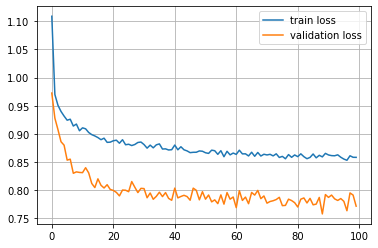

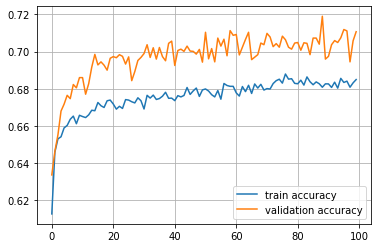

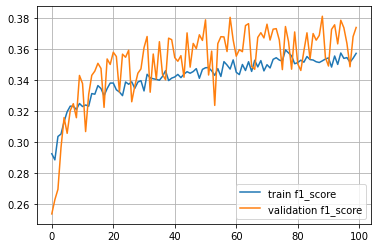

In [19]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### convolution layer 1개에 8개의 데이터 범위를 기반으로 학습을 시키면 과적합되지 않고 학습이 됨
### 그러나 시간이 너무 오래 걸림 

### convolution 연산을 하지 않고 dense layer로만 학습을 진행시켜봐야겠음